# Upper Glycolysis model

Source: Edda Klipp - Systems biology chapter 12.1


ODE System

$$\begin{align}
\frac{d}{dt} \textrm{Glucose} &= v_1 - v2 \\
\frac{d}{dt} \textrm{Glucose-6-phosphate} &= v_2 - v_3 \\
\frac{d}{dt} \textrm{Fructose-6-phosphate} &= v_3 - v_4 + v_5 \\
\frac{d}{dt} \textrm{Fructose-1,6-bisphosphate} &= v_4 - v_5 - v_6 \\
\frac{d}{dt} \textrm{ATP} &= -v_2 - v_4 + v_7 \\
\end{align}$$

with mass-action kinetics 

$$\begin{align}
v_1 &= k_1 \\
v_2 &= k_2 \cdot \textrm{GLC} \cdot ATP \\
v_3 &= k_3 \cdot \textrm{G6P} - k_3^- \cdot F6P \\
v_4 &= k_4 \cdot \textrm{F6P} \cdot ATP \\
v_5 &= k_5 \cdot \textrm{FBP} \\
v_6 &= k_6 \cdot \textrm{FBP} \\
v_7 &= k_7 \cdot \textrm{ADP} \\
\end{align}$$

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from modelbase.ode import Model, Simulator
from modelbase.ode import ratefunctions as rf

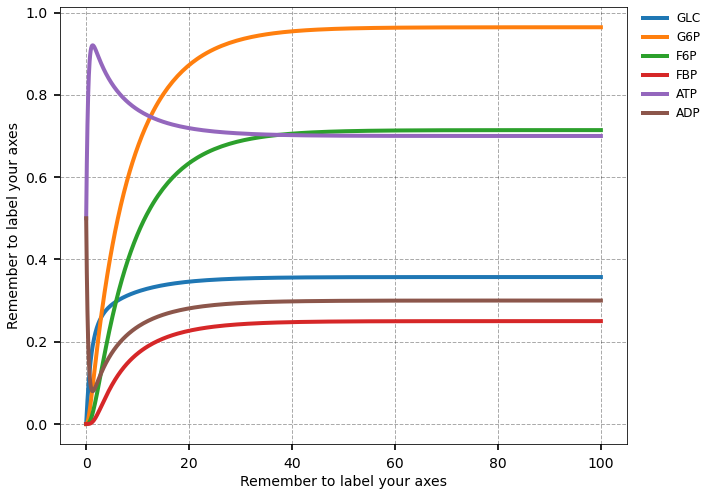

In [2]:
parameters = {
    "k1": 0.25,
    "k2": 1,
    "k3": 1,
    "k3m": 1,
    "k4": 1,
    "k5": 1,
    "k6": 1,
    "k7": 2.5,
}

m = Model(parameters)
m.add_compounds(["GLC", "G6P", "F6P", "FBP", "ATP", "ADP"])
m.add_reaction(
    rate_name="v1",
    function=rf.constant,
    stoichiometry={"GLC": 1},
    parameters=["k1"],
)
m.add_reaction(
    rate_name="v2",
    function=rf.mass_action_2,
    stoichiometry={"GLC": -1, "ATP": -1, "G6P": 1, "ADP": 1},
    parameters=["k2"],
)
m.add_reaction(
    rate_name="v3",
    function=rf.reversible_mass_action_1_1,
    stoichiometry={"G6P": -1, "F6P": 1},
    parameters=["k3", "k3m"],
    reversible=True,
)
m.add_reaction(
    rate_name="v4",
    function=rf.mass_action_2,
    stoichiometry={"F6P": -1, "ATP": -1, "ADP": 1, "FBP": 1},
    parameters=["k4"],
)
m.add_reaction(
    rate_name="v5",
    function=rf.mass_action_1,
    stoichiometry={"FBP": -1, "F6P": 1},
    parameters=["k5"],
)
m.add_reaction(
    rate_name="v6",
    function=rf.mass_action_1,
    stoichiometry={"FBP": -1},
    parameters=["k6"],
)
m.add_reaction(
    rate_name="v7",
    function=rf.mass_action_1,
    stoichiometry={"ADP": -1, "ATP": 1},
    parameters=["k7"],
)

y0 = {
    "GLC": 0,
    "G6P": 0,
    "F6P": 0,
    "FBP": 0,
    "ATP": 0.5,
    "ADP": 0.5,
}

s = Simulator(m)
s.initialise(y0)
t, y = s.simulate(100)
fig, ax = s.plot()
plt.show()

## Task

Using `get_response_coefficients_df` and `plot_coefficient_heatmap`, recreate the following figure.

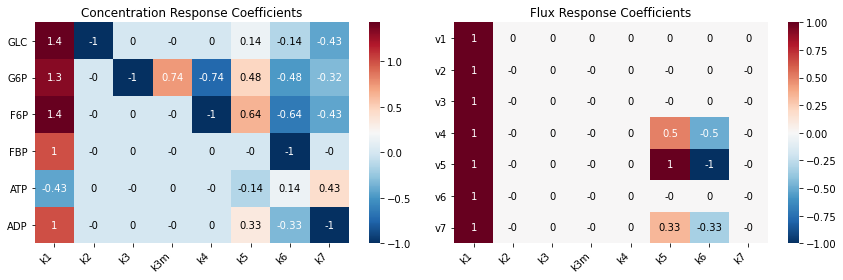

What does it show? What does it tell you?

In [3]:
from modelbase.ode.utils.mca import (
    get_response_coefficients_df,
    plot_coefficient_heatmap,
)

In [4]:
parameters = ["k1", "k2", "k3", "k3m", "k4", "k5", "k6", "k7"]
crc, frc = get_response_coefficients_df(m, parameters, y0, normalized=True)

  0%|          | 0/8 [00:00<?, ?it/s]

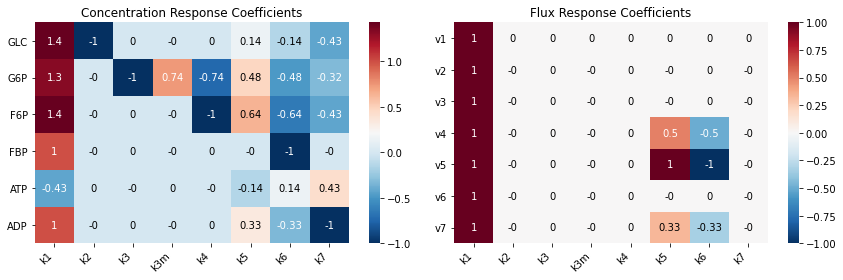

In [5]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))
plot_coefficient_heatmap(crc, "Concentration Response Coefficients", ax=ax1)
plot_coefficient_heatmap(frc, "Flux Response Coefficients", ax=ax2)
fig.tight_layout()
plt.show()

## Task

Calculate the sum per row of the flux response coefficients and concentration response coefficients. What do you observe?

In [6]:
frc.sum(axis=0)

v1    1.000000
v2    1.000000
v3    1.000003
v4    1.000006
v5    1.000006
v6    1.000006
v7    1.000004
dtype: float64

In [7]:
crc.sum(axis=0)

GLC    0.000002
G6P    0.000007
F6P    0.000008
FBP    0.000006
ATP   -0.000002
ADP    0.000004
dtype: float64